## Assignment 1
### Name: Barun Parua
### Roll Number: 21CS10014

First of all, we take the excel input and convert it into a pandas dataframe for easier manipulation. We then apply normalisation and then split the data to appropriate subsets for training, validation and testing purposes. 

As this is a binary classification problem, we define the class Ürgüp Sivrisi as 1 and the other class Çerçevelik as 0 for ease of notation. Note that this is just a convention.

In [61]:
# importing all the necessary libraries
# pandas for reading the csv file, numpy for mathematical operations, matplotlib for plotting the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# extracting the dataset from the excel file, checking the shape of the dataset and randomizing the dataset and splitting it into x and y values
df = pd.read_excel('../../dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx')
print("Shape of the dataset: ", df.shape)

# randomizing the dataset
df = df.sample(frac=1).reset_index(drop=True)

# splitting the dataset into x and y values
x_total = df.iloc[:, :-1].values
y_total = df.iloc[:, -1].values
print("Shape of x:", x_total.shape, "Shape of y:", y_total.shape)


y_total = np.where(y_total == 'Ürgüp Sivrisi', int(1), int(0))

print("First 5 rows of the dataset: \n", df.head())
print("\nFirst 5 values of y after converting to 0 and 1: \n", y_total[:5])

Shape of the dataset:  (2500, 13)
Shape of x: (2500, 12) Shape of y: (2500,)
First 5 rows of the dataset: 
      Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0   70609   1011.299           393.8305           228.6390        71270   
1   93799   1285.858           542.4610           220.6602        94619   
2   77358   1147.854           488.9031           201.6832        78007   
3   65024    964.932           360.9694           230.4917        65576   
4  105209   1324.626           545.2486           246.9796       106238   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        299.8369        0.8142    0.9907  0.6798     0.8676         1.7225   
1        345.5844        0.9135    0.9913  0.6396     0.7129         2.4584   
2        313.8396        0.9109    0.9917  0.6538     0.7378         2.4241   
3        287.7345        0.7696    0.9916  0.7476     0.8776         1.5661   
4        366.0004        0.8915    0.9903  0.7

In [63]:
# normalise the data using mean and standard deviation to avoid overflow and/or underflow errors
for i in range(0, len(x_total[0])):
    mean = np.mean(x_total[:, i])
    std = np.std(x_total[:, i])
    x_total[:, i] = (x_total[:, i] - mean) / std

In [64]:
# split the data into train, test and validation set
# train set: 50%
# validation set: 30%
# test set: 20%
train_size = int(0.5 * len(x_total))
validation_size = int(0.3 * len(x_total))
test_size = int(0.2 * len(x_total))

# splitting the data into train, validation and test set
x_train = x_total[:train_size]
x_validation = x_total[train_size:train_size+validation_size]
x_test = x_total[train_size+validation_size:]

y_train = y_total[:train_size]
y_validation = y_total[train_size:train_size+validation_size]
y_test = y_total[train_size+validation_size:]

# checking the shape of the data
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (1250, 12)
Shape of y_train:  (1250,)
Shape of x_test:  (500, 12)
Shape of y_test:  (500,)


Now, as this is a binary classification problem, we will use the sigmoid function as our hypothesis function. Then on the basis of the hypothesis function, we predict the classes of the data points.Then we defined the appropriate cost function and then used gradient descent method to minimize the costs.

In [65]:
# gradient descent method for logistic regression
# necessary functions for gradient descent method

# sigmoid and predict functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x,theta):
    return sigmoid(np.dot(x, theta))

# cost function and gradient descent function
def cost(x,y,theta):
    return -np.mean(y * np.log(predict(x, theta)) + (1 - y) * np.log(1 - predict(x, theta)))

def gradient_descent(x,y,theta,learning_rate):
    return theta - learning_rate * np.dot(x.T, predict(x, theta) - y) / len(y)

Finally, we do the Gradient Descent and find the optimal values of the parameters theta using different learning rates. It can be seen that the number of iterations is less for higher learning rates. This is because the step size is larger for higher learning rates and hence the convergence is faster. Therefore I have set it such that number of iterations for a learning rate is 10 * (1/learning_rate_value).

It can be seen that the cost value attains a minimum value in each case as we have set the iterations properly. Hence, again the parameters are used to predict the values of y for the test data.

Now while the output y can be any value between 0 and 1, we need to convert it to 0 or 1. This is done by setting a threshold value. If the value of y is greater than the threshold value, then it is set to 1, else it is set to 0. The threshold value is set to 0.5 for this case.

Finally, the accuracy, precision, recall and are calculated for each of the learning rates. The results for all the learning rates are shown below.

Analysis for Learning Rate = 0.1 with 100 iterations: 
Theta: 
[-0.13986518 -0.03279262  0.40759002 -0.06040112 -0.13519599  0.33809902
  0.72816883  0.22244932 -0.00282432 -0.13680537  1.32062643 -0.39662375]
Accuracy:  0.872
Precision:  0.9319371727748691
Recall:  0.777292576419214


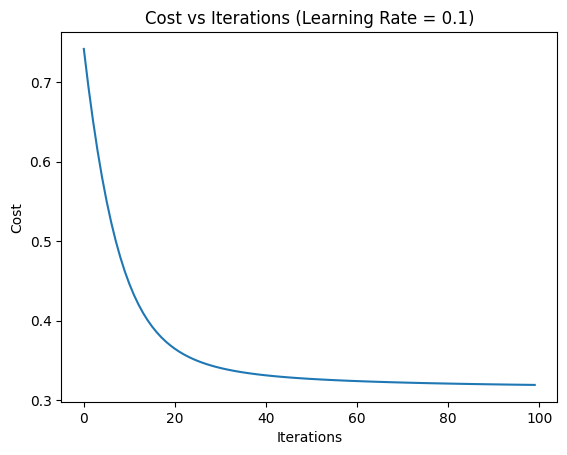

In [66]:
# applying gradient descent on the train set for appropriate number of iterations with different learning rates and plotting the cost vs iterations graph
theta_grad = np.random.rand(x_train.shape[1])
costs = []
learning_rate = 0.1
for i in range(100):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print("Analysis for Learning Rate =", learning_rate, "with", i+1, "iterations: ")
print("Theta: ")
print(theta_grad)

# apply the obtained theta on the test set and calculate the accuracy, precision and recall
y_pred = np.dot(x_test, theta_grad)

# calculating true positives, true negatives, false positives and false negatives
tp, tn, fp, fn, = 0, 0, 0, 0

# apply the threshold of 0.5 and check the values of y_pred and y_test
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
    if y_pred[i] == 1 and y_test[i] == 1:
        tp += 1
    elif y_pred[i] == 0 and y_test[i] == 0:
        tn += 1
    elif y_pred[i] == 1 and y_test[i] == 0:
        fp += 1
    else:
        fn += 1
        
# calculating accuracy, precision and recall based on the obtained values
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))
print("Precision: ", tp/(tp+fp))
print("Recall: ", tp/(tp+fn))

# plot the cost using matplotlib to get an idea of how the cost function varies with the number of iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.1)')
plt.show()

Analysis for Learning Rate = 0.01 with 1000 iterations: 
Theta: 
[ 0.56469085  0.31537608  0.32384319 -0.1166017  -0.31744793 -0.40916841
  0.80574735  0.39710624  0.14571165 -0.46417713  0.89289562 -0.31849838]
Accuracy:  0.868
Precision:  0.9267015706806283
Recall:  0.7729257641921398


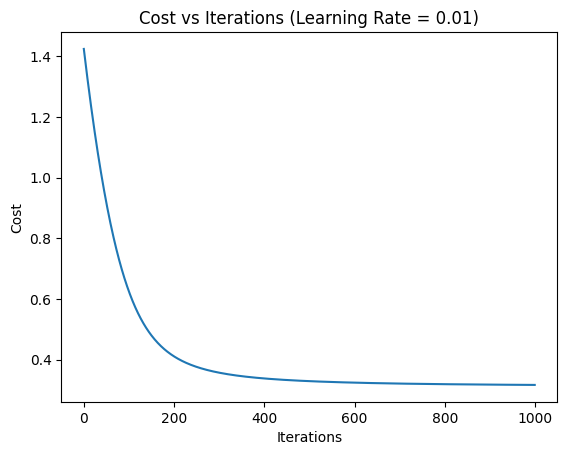

In [67]:
# applying gradient descent on the train set for appropriate number of iterations with different learning rates and plotting the cost vs iterations graph
theta_grad = np.random.rand(x_train.shape[1])
costs = []
learning_rate = 0.01
for i in range(1000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print("Analysis for Learning Rate =", learning_rate, "with", i+1, "iterations: ")
print("Theta: ")
print(theta_grad)

# apply the obtained theta on the test set and calculate the accuracy, precision and recall
y_pred = np.dot(x_test, theta_grad)

# calculating true positives, true negatives, false positives and false negatives
tp, tn, fp, fn, = 0, 0, 0, 0

# apply the threshold of 0.5 and check the values of y_pred and y_test
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
    if y_pred[i] == 1 and y_test[i] == 1:
        tp += 1
    elif y_pred[i] == 0 and y_test[i] == 0:
        tn += 1
    elif y_pred[i] == 1 and y_test[i] == 0:
        fp += 1
    else:
        fn += 1
        
# calculating accuracy, precision and recall based on the obtained values
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))
print("Precision: ", tp/(tp+fp))
print("Recall: ", tp/(tp+fn))

# plot the cost using matplotlib to get an idea of how the cost function varies with the number of iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.01)')
plt.show()

Analysis for Learning Rate = 0.001 with 10000 iterations: 
Theta: 
[ 0.08306153  0.19597722 -0.02652305 -0.29636562  0.10977027  0.1418317
  1.33655143  0.45496433  0.21116648 -0.61721659  0.81056922  0.03249813]
Accuracy:  0.874
Precision:  0.9191919191919192
Recall:  0.7947598253275109


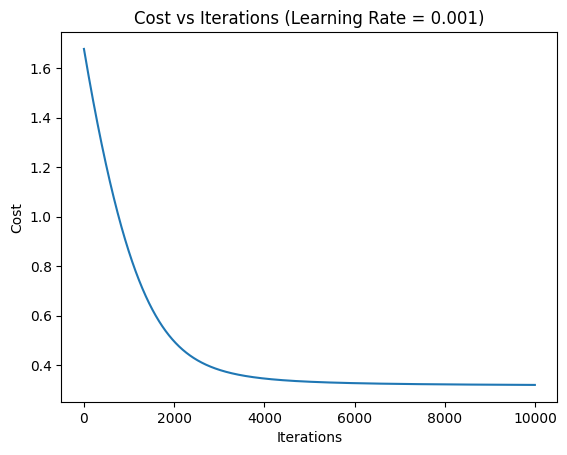

In [68]:
# applying gradient descent on the train set for appropriate number of iterations with different learning rates and plotting the cost vs iterations graph
theta_grad = np.random.rand(x_train.shape[1])
costs = []
learning_rate = 0.001
for i in range(10000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print("Analysis for Learning Rate =", learning_rate, "with", i+1, "iterations: ")
print("Theta: ")
print(theta_grad)

# apply the obtained theta on the test set and calculate the accuracy, precision and recall
y_pred = np.dot(x_test, theta_grad)

# calculating true positives, true negatives, false positives and false negatives
tp, tn, fp, fn, = 0, 0, 0, 0

# apply the threshold of 0.5 and check the values of y_pred and y_test
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
    if y_pred[i] == 1 and y_test[i] == 1:
        tp += 1
    elif y_pred[i] == 0 and y_test[i] == 0:
        tn += 1
    elif y_pred[i] == 1 and y_test[i] == 0:
        fp += 1
    else:
        fn += 1
        
# calculating accuracy, precision and recall based on the obtained values
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))
print("Precision: ", tp/(tp+fp))
print("Recall: ", tp/(tp+fn))

# plot the cost using matplotlib to get an idea of how the cost function varies with the number of iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.001)')
plt.show()

Analysis for Learning Rate = 0.0001 with 100000 iterations: 
Theta: 
[-0.3008083   0.63760531  0.82657353 -0.18495087 -0.22237932 -0.21110172
  1.22886002  0.57747896 -0.0077319   0.36594054  1.01689921 -0.23113656]
Accuracy:  0.874
Precision:  0.915
Recall:  0.7991266375545851


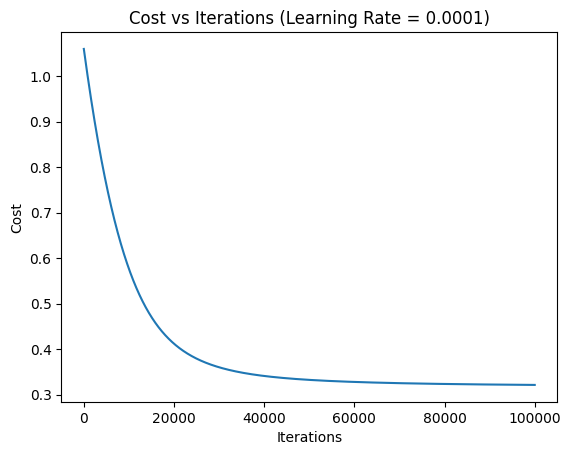

In [69]:
# applying gradient descent on the train set for appropriate number of iterations with different learning rates and plotting the cost vs iterations graph
theta_grad = np.random.rand(x_train.shape[1])
costs = []
learning_rate = 0.0001
for i in range(100000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print("Analysis for Learning Rate =", learning_rate, "with", i+1, "iterations: ")
print("Theta: ")
print(theta_grad)

# apply the obtained theta on the test set and calculate the accuracy, precision and recall
y_pred = np.dot(x_test, theta_grad)

# calculating true positives, true negatives, false positives and false negatives
tp, tn, fp, fn, = 0, 0, 0, 0

# apply the threshold of 0.5 and check the values of y_pred and y_test
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
    if y_pred[i] == 1 and y_test[i] == 1:
        tp += 1
    elif y_pred[i] == 0 and y_test[i] == 0:
        tn += 1
    elif y_pred[i] == 1 and y_test[i] == 0:
        fp += 1
    else:
        fn += 1
        
# calculating accuracy, precision and recall based on the obtained values
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))
print("Precision: ", tp/(tp+fp))
print("Recall: ", tp/(tp+fn))

# plot the cost using matplotlib to get an idea of how the cost function varies with the number of iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.0001)')
plt.show()